In [1]:
%matplotlib notebook

In [2]:
import numpy as np
from kurasiva import kurasiva, adjsol, follow_peaks
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, argrelmax
from scipy.optimize import linear_sum_assignment

In [3]:
seed = 100
def rnd_seeded(x):
    rs = np.random.RandomState(seed)
    return rs.random(len(x))

In [4]:
def gauss_d2(x):
    dx = x-np.average(x)
    s = np.std(dx)/3
    return np.exp(-dx**2/(2.0*s**2))*(dx**2/s**4-1/s**2)

def cos_x2(x):
    mu = np.average(x)
    return np.cos(x)*(x-mu)**2

In [5]:
sol_m = kurasiva(L=30*np.pi, N=400, dt=0.04, tsteps=2000, init=rnd_seeded)
sol_p = kurasiva(L=30*np.pi, N=400, dt=0.04, tsteps=2000, init=rnd_seeded, d1_sign=1)

<IPython.core.display.Javascript object>


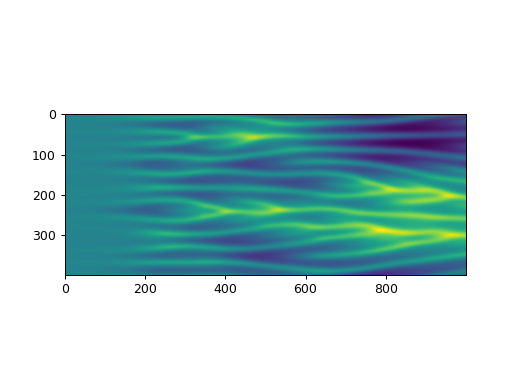

In [6]:
fig, ax = plt.subplots()

ax.imshow(adjsol(sol_m)[::2].T)

<IPython.core.display.Javascript object>


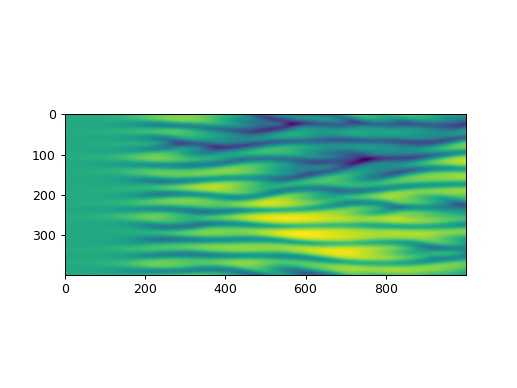

In [10]:
fig, ax = plt.subplots()

ax.imshow(adjsol(sol_p)[::2].T)

In [7]:
# Scan to find all peaks
peak_lines_m = follow_peaks(sol_m)

<IPython.core.display.Javascript object>


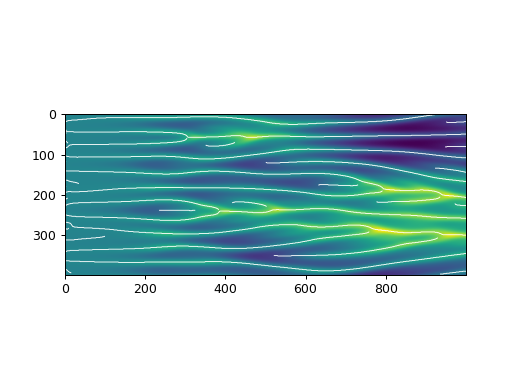

In [9]:
fig, ax = plt.subplots()

skip = 2

ax.imshow(adjsol(sol_m)[::skip].T)

for l in peak_lines_m:
    ax.plot(np.array(l[0][::skip])/skip, l[1][::skip], lw=0.7, c=(1,1,1))